# Import Package and Data

## Import Package

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import numpy as np
import pandas as pd
import json
from datetime import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mticker

sns.set()

from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from __future__ import print_function
from scipy.signal import savgol_filter

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import spearmanr, pearsonr
from sklearn.svm import SVR
from math import sqrt
from sklearn.ensemble import RandomForestRegressor

## Import Data

In [2]:

a=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_sa.csv')
b=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_b.csv')
c=pd.read_csv('c://users//kuerban//Desktop/ML/Data/Unit_c.csv')



xa=a[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]
xb=b[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]
xc=c[['pn0.3','pn0.5','pn1.0','pn2.5','pn5','pn10','pm1.0','pm2.5','pm10','hw2.5','hw10','shinyei','samyoung']]



ya=a['PM']
yb=b['PM']
yc=c['PM']





## Train and Predict

In [3]:
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.0001)

features = xa
targets = ya
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)


apa = svr_rbf.fit(X_train, y_train).predict(xa)
apb = svr_rbf.fit(X_train, y_train).predict(xb)
apc = svr_rbf.fit(X_train, y_train).predict(xc)


features = xb
targets = yb
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)


bpa = svr_rbf.fit(X_train, y_train).predict(xa)
bpb = svr_rbf.fit(X_train, y_train).predict(xb)
bpc = svr_rbf.fit(X_train, y_train).predict(xc)

features = xc
targets = yc
X_train, X_test, y_train, y_test = train_test_split(features, targets, train_size=0.8, random_state=42)


cpa = svr_rbf.fit(X_train, y_train).predict(xa)
cpb = svr_rbf.fit(X_train, y_train).predict(xb)
cpc = svr_rbf.fit(X_train, y_train).predict(xc)




C:\Users\kuerban\New folder\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [4]:
########################################################################


apa = savgol_filter(apa, 51, 3)
apb = savgol_filter(apb, 51, 3)
apc = savgol_filter(apc, 51, 3)


apa[apa<0]=0
apb[apb<0]=0
apc[apc<0]=0



########################################################################

bpa = savgol_filter(bpa, 51, 3)
bpb = savgol_filter(bpb, 51, 3)
bpc = savgol_filter(bpc, 51, 3)


bpa[bpa<0]=0
bpb[bpb<0]=0
bpc[bpc<0]=0

########################################################################

cpa = savgol_filter(cpa, 51, 3)
cpb = savgol_filter(cpb, 51, 3)
cpc = savgol_filter(cpc, 51, 3)


cpa[cpa<0]=0
cpb[cpb<0]=0
cpc[cpc<0]=0


########################################################################
# Smoothing CPC Data and make sure all of them are positive


ya = savgol_filter(ya, 51, 3)
yb = savgol_filter(yb, 51, 3)
yc = savgol_filter(yc, 51, 3)


ya[ya<0]=0
yb[yb<0]=0
yc[yc<0]=0



In [5]:
print('########################################################################')
apa_test_score = r2_score(ya, apa)
apb_test_score = r2_score(yb, apb)
apc_test_score = r2_score(yc, apc)

print('aa:',apa_test_score)
print('ab:',apb_test_score)
print('ac:',apc_test_score)
print('########################################################################')





bpa_test_score = r2_score(ya, bpa)
bpb_test_score = r2_score(yb, bpb)
bpc_test_score = r2_score(yc, bpc)

print('ba:',bpa_test_score)
print('bb:',bpb_test_score)
print('bc:',bpc_test_score)
print('########################################################################')


cpa_test_score = r2_score(ya, cpa)
cpb_test_score = r2_score(yb, cpb)
cpc_test_score = r2_score(yc, cpc)

print('ca:',cpa_test_score)
print('cb:',cpb_test_score)
print('cc:',cpc_test_score)
print('########################################################################')

########################################################################
aa: 0.8443057958310145
ab: 0.7295447322641526
ac: 0.8055688920286825
########################################################################
ba: 0.6352135550173186
bb: 0.936479804015107
bc: 0.8652832756482943
########################################################################
ca: 0.6707967253737577
cb: 0.8596679653100086
cc: 0.9342893482023109
########################################################################


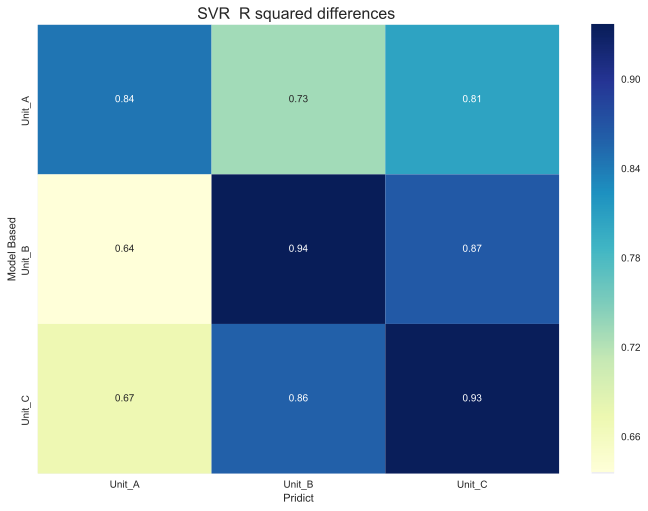

In [6]:
data = { 'Model Based' : [ 'Unit_A','Unit_A','Unit_A',  'Unit_B','Unit_B','Unit_B', 'Unit_C','Unit_C','Unit_C'],  'Pridict' : ['Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C','Unit_A','Unit_B','Unit_C'], 'R_squard' : [apa_test_score,apb_test_score,apc_test_score,bpa_test_score,bpb_test_score,bpc_test_score,cpa_test_score,cpb_test_score,cpc_test_score] }
Matrix = pd.DataFrame(data)
Matrix= Matrix.pivot('Model Based', "Pridict", "R_squard")

fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
ax = sns.heatmap(Matrix,annot=True,cmap="YlGnBu")
ax.set_title('SVR  R squared differences ',fontsize=16)
plt.savefig("sr.png", dpi = 900)

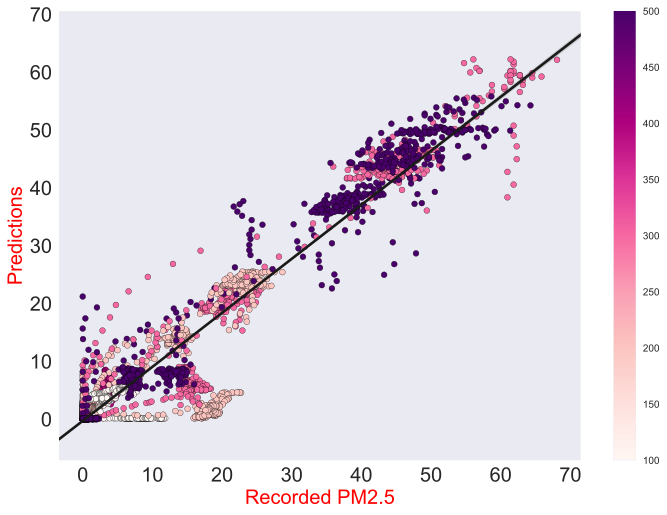

In [7]:
fig, s = plt.subplots()
fig.set_size_inches(11.7, 8.27)

b['p']=bpb
points = plt.scatter(b["PM"], b["p"],
                     s=35, c=b["Size"], cmap="RdPu",marker='o',edgecolors='k')
plt.colorbar(points)

s=sns.regplot("PM", "p", data=b, scatter=False, color=".1")
s.grid(False)

s.set_xlabel('Recorded PM2.5',fontsize=15,color='r',position=(0.5,0.5))
s.set_ylabel('Predictions',fontsize=15,color='r',position=(0.5,0.5))
#s.set_title('Model Based on Random Forest Predict different Size of Particles',fontsize=16)
plt.savefig("1.png", dpi = 900)


for item in ([s.title, s.xaxis.label, s.yaxis.label] +
              s.get_xticklabels() + s.get_yticklabels()):
    item.set_fontsize(20)

In [13]:
b.to_csv('unitB.csv')

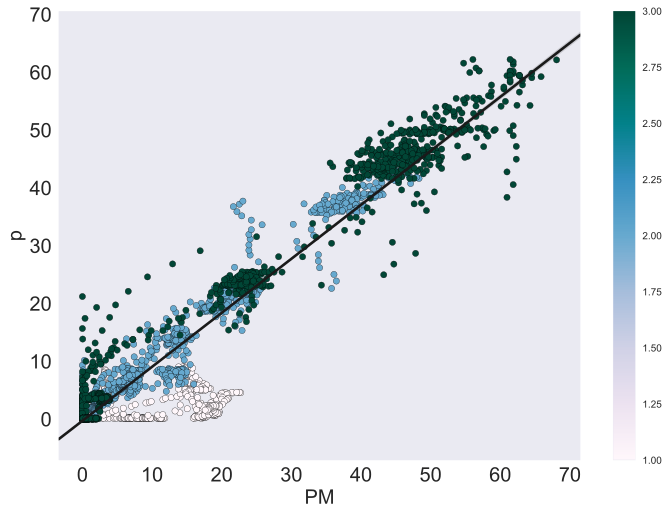

In [8]:
fig, s = plt.subplots()
fig.set_size_inches(11.7, 8.27)

b['p']=bpb
points = plt.scatter(b["PM"], b["p"],
                     s=40, c=b["Particle Shape"], cmap="PuBuGn",marker='o',edgecolors='k')
plt.colorbar(points)


s=sns.regplot("PM", "p", data=b, scatter=False, color=".1")
s.grid(False)



#s.set_xlabel('Recorded PM2.5',fontsize=15,color='r',position=(0.5,0.5))
#s.set_ylabel('Predictions',fontsize=15,color='r',position=(0.5,0.5))
#s.set_title('Model Based on Random Forest Predict different type of Particles',fontsize=16)
plt.savefig("2.png", dpi = 900)

for item in ([s.title, s.xaxis.label, s.yaxis.label] +
              s.get_xticklabels() + s.get_yticklabels()):
    item.set_fontsize(20)